<a href="https://colab.research.google.com/github/hanineji/my-machie_learning-project/blob/main/notebooks/Machine_Learning_Modelli_Neurali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#----Setup---

#---*Procedure di importazione dei moduli e delle librerie*---

In [ ]:
import numpy as np
import keras
from keras import Input
from keras import layers
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt


#---*Parametri*---

In [ ]:
num_classes=10
imput_shape=(528,28,1)

#---*Caricamento dataset*---

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

#----*Preprocessing*----

In [ ]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/25

#---*Aggiungere la dimensione del canale*---

In [ ]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print("x_train shape:",x_train.shape)
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")

#---*Codifica one-hot delle classi*---

In [ ]:
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)


---*Definizione modell CNN*---

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)
model = Sequential([Input(shape=input_shape),

    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])

#---*Compilazione*---

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#---*Training*---

In [23]:
history=model.fit(x_train,y_train, batch_size=128, epochs=5, validation_split=0.1, verbose=1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 151s 346ms/step - accuracy: 0.8404 - loss: 0.4966 - val_accuracy: 0.9835 - val_loss: 0.0584
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 337ms/step - accuracy: 0.9703 - loss: 0.0982 - val_accuracy: 0.9882 - val_loss: 0.0449
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 143s 338ms/step - accuracy: 0.9789 - loss: 0.0686 - val_accuracy: 0.9902 - val_loss: 0.0396
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 142s 336ms/step - accuracy: 0.9835 - loss: 0.0537 - val_accuracy: 0.9893 - val_loss: 0.0375
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 146s 346ms/step - accuracy: 0.9850 - loss: 0.0487 - val_accuracy: 0.9905 - val_loss: 0.0359


#---*Valutazione*---

In [24]:
score=model.evaluate(x_test,y_test,verbose=0)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Test loss: 0.1863379329442978
Test accuracy: 0.9904999732971191


#---*Salvataggio modello*---

In [25]:
import os
os.makedirs("models,exist_ok=True")
model.save("models/minst_cnn.keras")

FileNotFoundError: [Errno 2] No such file or directory: 'models/minst_cnn.keras'

#---*Visualizzare il grafico con matplotlib*---

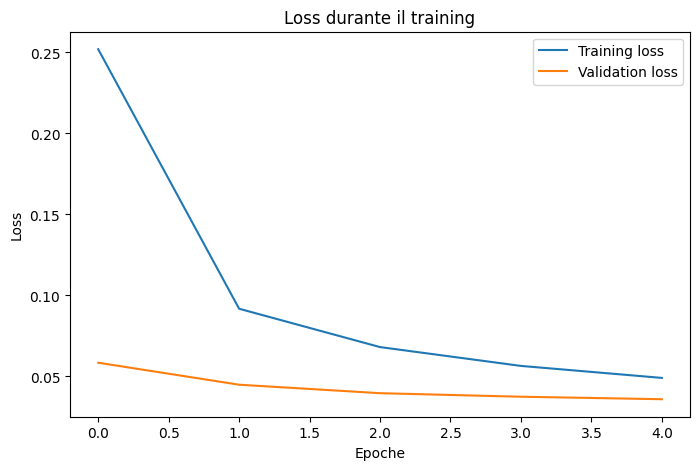

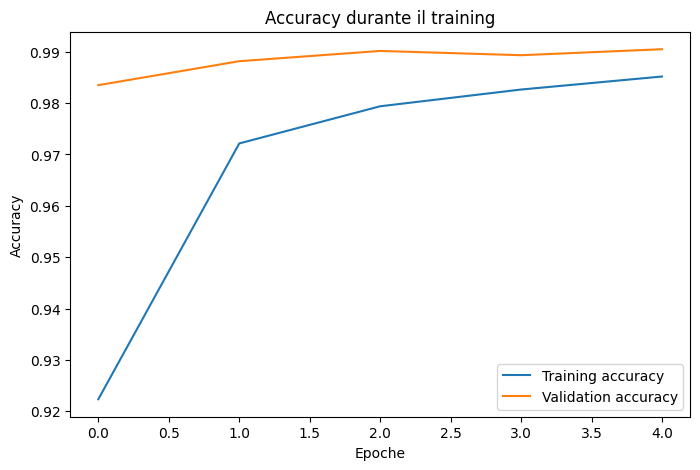

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss durante il training')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy durante il training')
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
